In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('../input/the-ultimate-halloween-candy-power-ranking/candy-data.csv')

In [5]:
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [7]:
names = data['competitorname']
data.drop('competitorname' , axis = 1 , inplace = True)

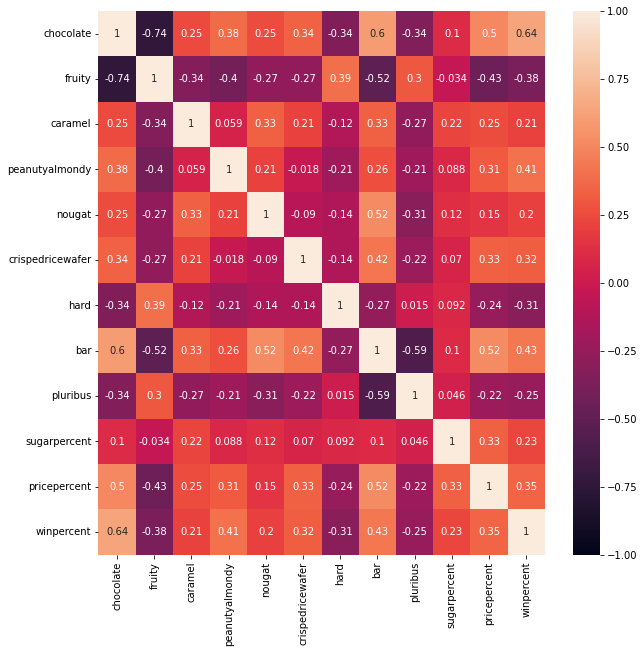

In [9]:
#visualizing 
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr() , annot = True , vmin = -1 , vmax = 1)
plt.show()

In [10]:
# we are going to predict if a given chocolate is a chocolate bar or not instead of winpercentage

In [11]:
# preprocessing 
data.isnull().any()

chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

In [13]:
y = data['bar']
X = data.drop('bar' , axis = 1)

In [14]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)

In [15]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,pluribus,sugarpercent,pricepercent,winpercent
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.737973,0.879793,0.721251
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.606960,0.518135,0.731475
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108808,0.158998
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.518135,0.383432
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916070,0.518135,0.484266
...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213920,0.108808,0.372900
81,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083930,0.108808,0.268350
82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.309110,0.312953,0.355231
83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.179120,0.265285,0.315202


In [17]:
X_train , X_test , y_train ,y_test = train_test_split(X, y ,train_size = 0.7)

In [20]:
# taining our model 
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [24]:
print(f'Logistic Regression Accuracy : {model.score(X_test , y_test)}')

Logistic Regression Accuracy : 0.9615384615384616


In [ ]:
model.score()